I want to be an Vietnam billionaire games-selling mogul. To do this, I have to answer some questions:

1. What type of games would I sell?
2. Where would I sell?
3. Which platform's games would I sell?

In this code, I will analyse the data set from kaggle to answer these questions. 

Dataset is from Kaggle: https://www.kaggle.com/gregorut/videogamesales

# TABLE OF CONTENT

      I.   Inspect the dataset
      II.  Clening data  
      III. Analysing global sales by genre
      IV.  Analysing global sales by continents
      V.   Analysing NA sales by genre, platform
      VI.  Conclusion

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
game_revenue = pd.read_csv("C:\\Users\\admin\\Desktop\\Game_revenue\\vgsales.csv")

## I. Inspect the dataset

In [3]:
print(game_revenue.head())

   Rank                      Name Platform    Year         Genre Publisher  \
0     1                Wii Sports      Wii  2006.0        Sports  Nintendo   
1     2         Super Mario Bros.      NES  1985.0      Platform  Nintendo   
2     3            Mario Kart Wii      Wii  2008.0        Racing  Nintendo   
3     4         Wii Sports Resort      Wii  2009.0        Sports  Nintendo   
4     5  Pokemon Red/Pokemon Blue       GB  1996.0  Role-Playing  Nintendo   

   NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales  
0     41.49     29.02      3.77         8.46         82.74  
1     29.08      3.58      6.81         0.77         40.24  
2     15.85     12.88      3.79         3.31         35.82  
3     15.75     11.01      3.28         2.96         33.00  
4     11.27      8.89     10.22         1.00         31.37  


# II. Cleaning data
1. Check null value

In [4]:
game_revenue.isna().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

2. Remove missing value

In [5]:
game_revenue = game_revenue.dropna()
game_revenue.isna().sum()

Rank            0
Name            0
Platform        0
Year            0
Genre           0
Publisher       0
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
dtype: int64

Summary about the dataset

In [6]:
game_revenue.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16291 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16291 non-null  int64  
 1   Name          16291 non-null  object 
 2   Platform      16291 non-null  object 
 3   Year          16291 non-null  float64
 4   Genre         16291 non-null  object 
 5   Publisher     16291 non-null  object 
 6   NA_Sales      16291 non-null  float64
 7   EU_Sales      16291 non-null  float64
 8   JP_Sales      16291 non-null  float64
 9   Other_Sales   16291 non-null  float64
 10  Global_Sales  16291 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


## III. Analysing global sales by genre

In [7]:
global_sales_by_genre = game_revenue.groupby("Genre")["Global_Sales"].agg(sum)
print(global_sales_by_genre)

Genre
Action          1722.84
Adventure        234.59
Fighting         444.05
Misc             789.87
Platform         829.13
Puzzle           242.21
Racing           726.76
Role-Playing     923.83
Shooter         1026.20
Simulation       389.98
Sports          1309.24
Strategy         173.27
Name: Global_Sales, dtype: float64


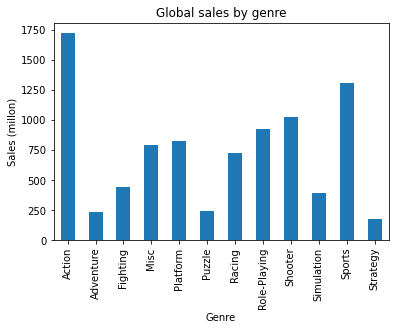

In [8]:
global_sales_by_genre.plot(kind="bar")
plt.xlabel("Genre")
plt.ylabel("Sales (millon)")
plt.title("Global sales by genre")
plt.show()

As you can see, Action game has the highest revenue - to the tune of $1750m. The next is sports game 
and Shooter game respectively. 

## IV. Analysing global sales by continents

Creat dataframe from 4 continents

In [11]:
game_revenue_by_continents = game_revenue[["NA_Sales","EU_Sales","JP_Sales","Other_Sales"]]
print(game_revenue_by_continents.head())

   NA_Sales  EU_Sales  JP_Sales  Other_Sales
0     41.49     29.02      3.77         8.46
1     29.08      3.58      6.81         0.77
2     15.85     12.88      3.79         3.31
3     15.75     11.01      3.28         2.96
4     11.27      8.89     10.22         1.00


Revenue by continents

In [12]:
total_sales_by_continents = game_revenue_by_continents.sum(axis = 0)
print(total_sales_by_continents)

NA_Sales       4327.65
EU_Sales       2406.69
JP_Sales       1284.27
Other_Sales     788.91
dtype: float64


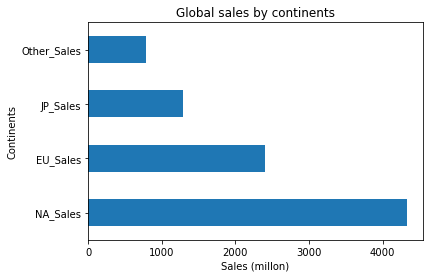

In [13]:
total_sales_by_continents.plot(kind = "barh")
plt.xlabel("Sales (millon)")
plt.ylabel("Continents")
plt.title("Global sales by continents")
plt.show()

So I should focus on NA market with peak sales of $4,000m. Let see what type of games should I sell here 
(From Global sales by genre chart, it could be action games, I guess :3) 

## V. Analysing NA sales by genre, platform

In [9]:
NA_sales_by_genre = game_revenue.groupby("Genre")["NA_Sales"].agg(sum)
print(NA_sales_by_genre)

Genre
Action          861.77
Adventure       101.93
Fighting        220.74
Misc            396.92
Platform        445.99
Puzzle          122.01
Racing          356.93
Role-Playing    326.50
Shooter         575.16
Simulation      181.78
Sports          670.09
Strategy         67.83
Name: NA_Sales, dtype: float64


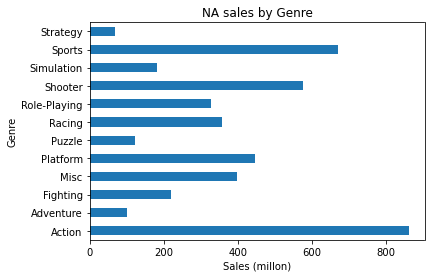

In [10]:
NA_sales_by_genre.plot(kind = "barh")
plt.xlabel("Sales (millon)")
plt.ylabel("Genre")
plt.title("NA sales by Genre")
plt.show()

From the analysis, I should sell Action game in the US. Now let's find out 

In [11]:
NA_Sales_df = game_revenue[["Genre","NA_Sales","Publisher","Platform"]]
print(NA_Sales_df)

              Genre  NA_Sales   Publisher Platform
0            Sports     41.49    Nintendo      Wii
1          Platform     29.08    Nintendo      NES
2            Racing     15.85    Nintendo      Wii
3            Sports     15.75    Nintendo      Wii
4      Role-Playing     11.27    Nintendo       GB
...             ...       ...         ...      ...
16593      Platform      0.01       Kemco      GBA
16594       Shooter      0.01  Infogrames       GC
16595        Racing      0.00  Activision      PS2
16596        Puzzle      0.00    7G//AMES       DS
16597      Platform      0.01     Wanadoo      GBA

[16291 rows x 4 columns]


In [12]:
NA_Sales_df_sorted_by_Genre_Action= NA_Sales_df[NA_Sales_df["Genre"] == "Action"]
print(NA_Sales_df_sorted_by_Genre_Action)

        Genre  NA_Sales                  Publisher Platform
16     Action      7.01       Take-Two Interactive      PS3
17     Action      9.43       Take-Two Interactive      PS2
23     Action      9.63       Take-Two Interactive     X360
24     Action      8.41       Take-Two Interactive      PS2
38     Action      6.99       Take-Two Interactive      PS2
...       ...       ...                        ...      ...
16564  Action      0.01  Destination Software, Inc       DS
16567  Action      0.00         Namco Bandai Games      3DS
16582  Action      0.01                      Titus      GBA
16583  Action      0.01         Virgin Interactive      N64
16589  Action      0.00            dramatic create      PSV

[3251 rows x 4 columns]


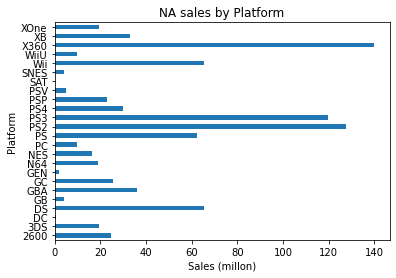

In [13]:
NA_Sales_df_sorted_by_platform = NA_Sales_df_sorted_by_Genre_Action.groupby("Platform")["NA_Sales"].agg(sum)
NA_Sales_df_sorted_by_platform.plot(kind = "barh")
plt.xlabel("Sales (millon)")
plt.ylabel("Platform")
plt.title("NA sales by Platform")
plt.show()

From the chart, I should sell action game on XB, PS2 and PS3 platform to earn maximize profit. (A)

In [14]:
NA_Sales_df_sorted_by_Genre_Sports= NA_Sales_df[NA_Sales_df["Genre"] == "Sports"]
print(NA_Sales_df_sorted_by_Genre_Sports)

        Genre  NA_Sales             Publisher Platform
0      Sports     41.49              Nintendo      Wii
3      Sports     15.75              Nintendo      Wii
13     Sports      8.94              Nintendo      Wii
14     Sports      9.09              Nintendo      Wii
77     Sports      1.11       Electronic Arts      PS4
...       ...       ...                   ...      ...
16576  Sports      0.00  Alternative Software     XOne
16578  Sports      0.01               Mastiff      3DS
16579  Sports      0.01            Infogrames      N64
16581  Sports      0.00               Unknown      Wii
16587  Sports      0.00           Hudson Soft       DS

[2304 rows x 4 columns]


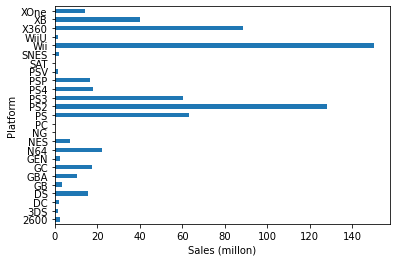

In [15]:
NA_Sales_df_sorted_by_Platform2 = NA_Sales_df_sorted_by_Genre_Sports.groupby("Platform")["NA_Sales"].agg(sum)
NA_Sales_df_sorted_by_Platform2.plot(kind = "barh")
plt.xlabel("Sales (millon)")
plt.ylabel("Platform")
plt.show()

From the chart, I should sell sports game on WiiU, X360, PS2 and PS3 platform to earn maximize profit. (B)

## VI. Conclusion

Finally, From (A) and (B) I thought I found the answer. I should sell action games and sport games in the US on WiiU, X360, XB, PS2 and PS3 platform.